In [1]:
import torch
import torch.nn as nn
import numpy as np
from datasets import load_dataset
from tqdm import tqdm
import pdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install --upgrade datasets
dataset = load_dataset("cnn_dailymail","3.0.0")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.9.0.13 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cufft-

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
!pip install git
!git clone https://github.com/osamakhaled123/Basic-Transformer-Model
!cd '/content/Basic-Transformer-Model'
%cd Basic-Transformer-Model/

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
Cloning into 'Basic-Transformer-Model'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 83 (delta 39), reused 59 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 55.84 KiB | 3.28 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/bin/bash: line 1: cd: /content/Basic-Transformer-Model: No such file or directory
/kaggle/working/Basic-Transformer-Model


In [4]:
import Processing_Summarizing_Datasets_From_Scratch as pre

In [5]:
articles = np.array(dataset['train'][:14000]['article'])
summaries = np.array(dataset['train'][:14000]['highlights'])
texts = {'articles':articles,
         'summaries':summaries}
max_input_len = 1000
max_target_len = 85

In [6]:
text_train, train_data, train_target, vocab = pre.preprocessing(texts, max_input_len, max_target_len, {})

In [7]:
text_train.shape, train_data.shape, train_target.shape, len(vocab)

((27932,), torch.Size([13966, 1000]), torch.Size([13966, 85]), 113285)

In [8]:
train_set, val_set, test_set = pre.splitting_and_batching(input_data=train_data, target_data=train_target,
                                                          split_frac=0.95, batch_size=32) # Reduced batch size

In [9]:
import Transformer_model

In [23]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model = Transformer_model.Transformer(
#     vocab=vocab,
#     max_input_length=max_input_len,
#     max_target_length=max_target_len,
#     emb_dim=256,
#     dff=1024,
#     num_heads=4,
#     num_encoder_blocks=4,
#     num_decoder_blocks=4,
#     dropout=0.5
# ).to(device)

In [24]:
# train_losses , val_losses = Transformer_model.train(model, train_set, val_set, 5, 0.005, device)

Epoch 1 accumelated Training batches loss is:		 24.429334249841162
Epoch 1 accuracy on Training batches is:		 0.0167060736566782


Epoch 1 accumelated validation batches loss is:		 9.386269396001643
Epoch 1 accuracy on validation batches is:		 0.011064469814300537


Epoch 2 accumelated Training batches loss is:		 9.871176620851081
Epoch 2 accuracy on Training batches is:		 0.027948256582021713


Epoch 2 accumelated validation batches loss is:		 8.719741647893732
Epoch 2 accuracy on validation batches is:		 0.022463813424110413


Epoch 3 accumelated Training batches loss is:		 9.826377374580108
Epoch 3 accuracy on Training batches is:		 0.02860877476632595


Epoch 3 accumelated validation batches loss is:		 8.632668408480557
Epoch 3 accuracy on validation batches is:		 0.02172183431684971


Epoch 4 accumelated Training batches loss is:		 9.802438464796687
Epoch 4 accuracy on Training batches is:		 0.02908843196928501


Epoch 4 accumelated validation batches loss is:		 8.375969019803135
Epoch 4 accuracy on validation batches is:		 0.040860794484615326


Epoch 5 accumelated Training batches loss is:		 9.787294130440218
Epoch 5 accuracy on Training batches is:		 0.029464444145560265


Epoch 5 accumelated validation batches loss is:		 8.371196053244851
Epoch 5 accuracy on validation batches is:		 0.040860794484615326


In [25]:
# saved_dict ={'model':model,
#             'train loss':train_losses,
#             'val losses':val_losses}

In [28]:
# torch.save(saved_dict, 'Transformer_Model.pt')

In [10]:
%cd /kaggle/working/

/kaggle/working


In [11]:
!pip install -q gdown
!gdown --id 1cxLyCAa4XH5xgaqV8CwTD_un3FEF1hGN --output Transformer_Model.pt


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1cxLyCAa4XH5xgaqV8CwTD_un3FEF1hGN
From (redirected): https://drive.google.com/uc?id=1cxLyCAa4XH5xgaqV8CwTD_un3FEF1hGN&confirm=t&uuid=bfeb06dd-724d-45bf-a38f-918777f316a9
To: /kaggle/working/Transformer_Model.pt
100%|█████████████████████████████████████████| 143M/143M [00:00<00:00, 180MB/s]


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
state_dict = torch.load('Transformer_Model.pt', map_location=device, weights_only=False)

In [14]:
model = state_dict['model']
train_losses = state_dict['train loss']
val_losses = state_dict['val losses']

In [15]:
sentence = """Harry Potter star Daniel Radcliffe gains access to a reported £20 million 
($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell 
on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the 
disappointment of gossip columnists around the world, the young actor says he has no plans to 
fritter his cash away on fast cars, drink and celebrity parties."""

In [23]:
generated = Transformer_model.summarize(model, sentence, 3, device, 10)

In [24]:
generated

['the the the the the the the the the', 'in in in in']

In [18]:
sns.set(style='whitegrid')

In [19]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for p in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + p * (1 - factor))
        else:
            smoothed.append(p)
    return smoothed

In [20]:
def plot_losses(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', color='royalblue', linewidth=2.5, marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', color='tomato', linewidth=2.5, marker='s')
    
    # Highlight min val loss
    min_val_idx = val_losses.index(min(val_losses))
    plt.scatter(min_val_idx + 1, val_losses[min_val_idx], color='green', s=100, label='Best Validation Loss')

    plt.title('Training vs Validation Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=13)
    plt.ylabel('Loss', fontsize=13)
    plt.xticks(epochs)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

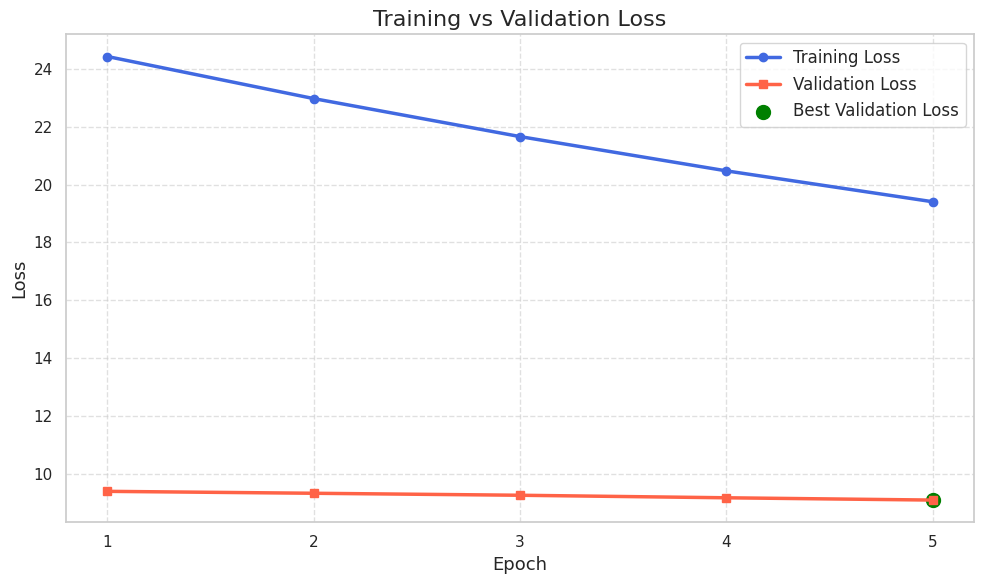

In [21]:
plot_losses(smooth_curve(train_losses), smooth_curve(val_losses))